# Regresión lineal

## Mínimos cuadrados

In [19]:
import numpy as np
from numpy.linalg import inv 
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.api as sm

### 1. Tabla de mínimos cuadrados

In [62]:
x = [16, 32, 48, 56, 64, 80]
y = [10, 15, 20, 22, 30, 32]
X = sm.add_constant(x)

In [60]:
xy = []
xx = []
for i in range(len(x)):
  xy.append(x[i]*y[i])
  xx.append(x[i]*x[i])

In [61]:
ls_table = [[x], [y], [xy], [xx]]
ls_table

[[[16, 32, 48, 56, 64, 80]],
 [[10, 15, 20, 22, 30, 32]],
 [[160, 480, 960, 1232, 1920, 2560]],
 [[256, 1024, 2304, 3136, 4096, 6400]]]

In [63]:
model = sm.OLS(y,X)
results = model.fit()
results.summary()

/Users/nasa_penguin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     88.13
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           0.000717
Time:                        15:09:26   Log-Likelihood:                -11.382
No. Observations:                   6   AIC:                             26.76
Df Residuals:                       4   BIC:                             26.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6041      2.070      1.741      0.157      -2.143       9.351
x1             0.3628      0.039      9.388      0.001       0.255       0.470
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.727
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.911
Skew:                           0.953   Prob(JB):                        0.634
Kurtosis:                       2.884   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Coeficiente de Pearson

In [64]:
pearson = np.corrcoef(x, y)[0][1]
pearson

0.978050965185273

### 3. Coeficiente de determinación

In [69]:
coef = results.params[1]
coef

0.3627551020408163

### 4. Pendiente de la tangente

In [66]:
def slope(x1,y1,x2,y2):
    x = (y2 - y1) / (x2 - x1)
    return x

In [67]:
slope(x[0], y[0], x[2], y[2])

0.3125

### 5. Ordenada al origen

In [70]:
intercept = results.params[0]
intercept

3.604081632653065

### 6. Establece la recta de regresión

In [73]:
ec = f"y = {coef} x + {intercept}"
ec

'y = 0.3627551020408163 x + 3.604081632653065'

### 7. Dibuja la gráfica de dispersión

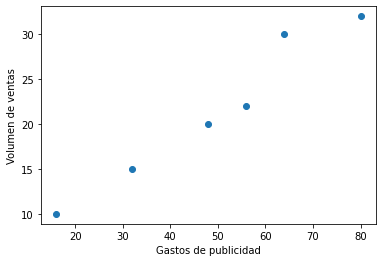

In [74]:
plt.scatter(x, y); plt.xlabel('Gastos de publicidad'); plt.ylabel('Volumen de ventas');

### 8. Línea de tendencia

In [75]:
y_pred = results.predict(X)

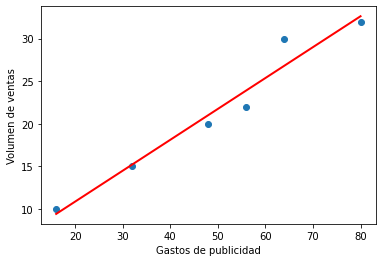

In [77]:
plt.scatter(x, y); plt.xlabel('Gastos de publicidad'); plt.ylabel('Volumen de ventas');
plt.plot(x, y_pred, c='red', linewidth=2)
plt.show()

### 9. Conclusión

Existe una relación lineal muy fuerte entre los gastos en publicidad en las ventas, por lo que entre más se invierta mayor serán las ganancias